# Implementation of AlexNet in Keras over Tensorflow in Python
### by Sarahí Aguilar




### About AlexNet overall architecture

AlexNet contains eight layers with weights; the first five are convolutional and the remaining three are fullyconnected. The output of the last  fully-connected layer is fed to a 1000-way softmax which produces a distribution over the 1000 class labels. This network maximizes the multinomial logistic regression objective, which is equivalent to maximizing the average across training cases of the log-probability of the correct label under the prediction distribution.

The kernels of the second, fourth, and fifth convolutional layers are connected only to those kernel maps in the previous layer which reside on the same GPU. The kernels of the third convolutional layer are connected to all kernel maps in the second layer. The neurons in the fullyconnected layers are connected to all neurons in the previous layer. Response-normalization layers follow the first and second convolutional layers. Max-pooling layers, follow both response-normalization layers as well as the fifth convolutional layer. The ReLU
non-linearity is applied to the output of every convolutional and fully-connected layer.

The first convolutional layer filters the 32×32×3 input image with 96 kernels of size 11×11×3 with a stride of 4 pixels (this is the distance between the receptive field centers of neighboring neurons in a kernel map). The second convolutional layer takes as input the (response-normalized and pooled) output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48.

The third, fourth, and fifth convolutional layers are connected to one another without any intervening pooling or normalization layers. The third convolutional layer has 384 kernels of size 3 × 3 × 256 connected to the (normalized, pooled) outputs of the second convolutional layer. The fourth
convolutional layer has 384 kernels of size 3 × 3 × 192 , and the fifth convolutional layer has 256 kernels of size 3 × 3 × 192. The fully-connected layers have 4096 neurons each.

Source: https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

![picture](https://raw.githubusercontent.com/sarahiaguilar/my-alexnet/main/alexnet_architecture.png)


#### Importing libraries

In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#### Importing Cifar10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Source: https://www.cs.toronto.edu/~kriz/cifar.html


In [18]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(32, 32, 3)

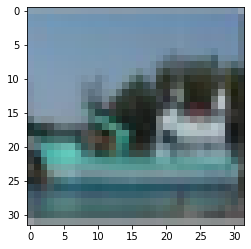

In [20]:
# Previewing random example image
example_image = train_images[111, :, :, :]
plt.imshow(example_image)
example_image.shape

#### Building net

In [21]:
model = keras.models.Sequential([
    # Convolutional layer #1
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    # Convolutional layer #2
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    # Convolutional layer #3
    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),

    # Convolutional layer #4
    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),

    # Convolutional layer #5
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    keras.layers.Flatten(),

    # Fully-connected layer #1
    keras.layers.Dense(4096, activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Dropout(0.5),

    # Fully-connected layer #2
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    # Fully-connected layer #3
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5),

    # Output layer
    keras.layers.Dense(10, activation='softmax')
])

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 6, 6, 96)          34944     
_________________________________________________________________
batch_normalization_30 (Batc (None, 6, 6, 96)          384       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 3, 3, 256)         614656    
_________________________________________________________________
batch_normalization_31 (Batc (None, 3, 3, 256)         1024      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 2, 2, 384)        

### Training net

In [23]:
model.fit(train_images, train_labels, epochs=150, validation_data=(test_images, test_labels))

Epoch 1/150
1563/1563 [==============================] - 16s 10ms/step - loss: 2.1896 - accuracy: 0.2005 - val_loss: 1.8117 - val_accuracy: 0.3412
Epoch 2/150
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8223 - accuracy: 0.3178 - val_loss: 1.7021 - val_accuracy: 0.3896
Epoch 3/150
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6504 - accuracy: 0.3899 - val_loss: 1.5285 - val_accuracy: 0.4503
Epoch 4/150
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5365 - accuracy: 0.4343 - val_loss: 1.7035 - val_accuracy: 0.4139
Epoch 5/150
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4459 - accuracy: 0.4722 - val_loss: 1.4383 - val_accuracy: 0.4898
Epoch 6/150
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3764 - accuracy: 0.5026 - val_loss: 1.3718 - val_accuracy: 0.5012
Epoch 7/150
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3029 - accuracy: 0.5315 - val_loss: 1

### Plotting losses

In [47]:
import matplotlib.pyplot as plt

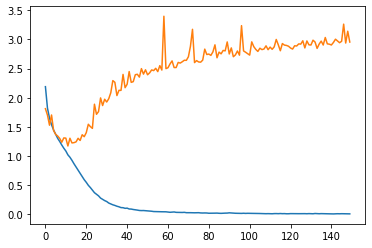

In [49]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])